In [98]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import mylib as lib
pd.set_option('display.float_format', lambda x: '%.6f' % x)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


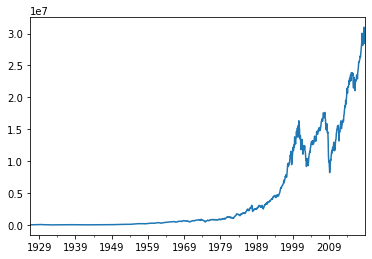

In [99]:
returns = lib.readcsv('data\ind30_m_vw_rets.csv')
returns.columns = returns.columns.str.strip()

size = lib.readcsv('data\ind30_m_size.csv', percentage = False)
size.columns = size.columns.str.strip()

firms = lib.readcsv('data\ind30_m_nfirms.csv', percentage = False)
firms.columns = firms.columns.str.strip()

marketsize_by_industry = size * firms
total_marketsize = marketsize_by_industry.sum(axis="columns")
total_marketsize.plot()

In [100]:
initial_wealth = 1000
floor = 0.8
multiplier = 3
cash_rate = 0.03
risky_assets = returns["2000":][["Steel", "Fin", "Beer"]]
safe_return = np.full_like(risky_assets, cash_rate/12)

In [101]:
len(risky_assets)

228

In [104]:
account_value = initial_wealth
months = risky_assets.shape[0]

account_history = pd.DataFrame().reindex_like(risky_assets)
cushion_history = pd.DataFrame().reindex_like(risky_assets)
risky_weight_history = pd.DataFrame().reindex_like(risky_assets)
floor_value = account_value * floor

for month in range(months):
    #floor_value = account_value * floor
    cushion = (account_value - floor_value) / account_value
    risky_weight = cushion * multiplier
    risky_weight = np.minimum(risky_weight, 1)
    risky_weight = np.maximum(risky_weight, 0)
    risky_values = risky_weight * account_value * risky_assets.iloc[month]
    safe_values = (1 - risky_weight) * account_value * safe_return[month]
    account_value = account_value + risky_values + safe_values

    account_history.iloc[month] = account_value
    cushion_history.iloc[month] = cushion
    risky_weight_history.iloc[month] = risky_weight
    risky_wealth = initial_wealth*(1+risky_assets).cumprod()

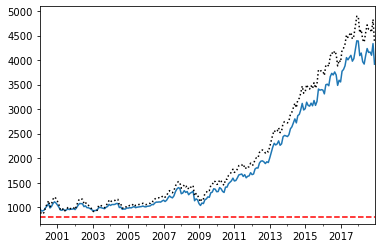

In [106]:
ind = "Beer"
ax = account_history[ind].plot()
risky_wealth[ind].plot(style="k:")
ax.axhline(y=floor_value, color='r', linestyle='--')

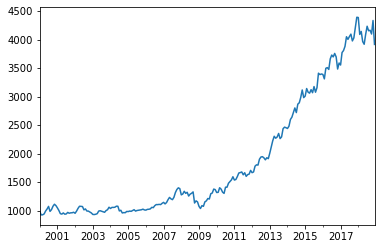